# Exploratory Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import sys

In [2]:
pwd, _ = os.path.split(os.getcwd())
sys.path.append(os.path.join(pwd, 'src'))
import plots

In [3]:
plt.style.use('seaborn-colorblind') # Set plot style

### Explore the data with built-in pandas methods

In [4]:
planet_data = pd.read_csv('../data/distinct_planets.csv')  #Load data from csv
planet_data.describe()

,disc_year,sy_snum,sy_pnum,glat,glon,pl_orbper,pl_rade,sy_dist,pl_eqt,pl_orbeccen
count,4401.000000,4401.000000,4401.000000,4401.000000,4401.000000,4.258000e+03,4387.000000,4395.000000,3277.000000,3918.000000
mean,2014.653488,1.112702,1.785276,6.609721,127.960978,3.925921e+03,5.695589,655.926678,919.583975,0.068775
std,3.877692,0.356147,1.171643,28.121658,92.566966,1.664259e+05,5.399877,910.792008,463.382033,0.143718
min,1989.000000,1.000000,1.000000,-88.324780,0.039250,9.070629e-02,0.296000,1.301190,50.000000,0.000000
25%,2014.000000,1.000000,1.000000,2.259890,73.900760,4.463672e+00,1.750000,134.354000,570.000000,0.000000
50%,2016.000000,1.000000,1.000000,12.115680,79.007860,1.181235e+01,2.730000,448.637000,827.000000,0.000000
75%,2016.000000,1.000000,2.000000,17.168900,187.392500,4.180833e+01,11.960000,863.864000,1164.000000,0.070000
max,2021.000000,4.000000,8.000000,86.470460,359.996270,8.040000e+06,77.342000,8500.000000,4050.000000,0.950000


In [5]:
planet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4401 entries, 0 to 4400
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pl_name          4401 non-null   object 
 1   discoverymethod  4401 non-null   object 
 2   disc_year        4401 non-null   int64  
 3   disc_facility    4401 non-null   object 
 4   sy_snum          4401 non-null   int64  
 5   sy_pnum          4401 non-null   int64  
 6   glat             4401 non-null   float64
 7   glon             4401 non-null   float64
 8   pl_orbper        4258 non-null   float64
 9   pl_rade          4387 non-null   float64
 10  sy_dist          4395 non-null   float64
 11  pl_eqt           3277 non-null   float64
 12  pl_orbeccen      3918 non-null   float64
dtypes: float64(7), int64(3), object(3)
memory usage: 447.1+ KB


NOTE:  Nulls in orbital period, planet radius, and system distance (sy_dist), planet temperature (pl_eqt), orbit eccentricity (pl_orbeccen) columns

In [6]:
disc_methods = planet_data['discoverymethod'].value_counts() # Find number of confirmed exoplanets per detection method
disc_methods

Transit                          3336
Radial Velocity                   850
Microlensing                      108
Imaging                            53
Transit Timing Variations          21
Eclipse Timing Variations          16
Pulsar Timing                       7
Orbital Brightness Modulation       6
Pulsation Timing Variations         2
Astrometry                          1
Disk Kinematics                     1
Name: discoverymethod, dtype: int64

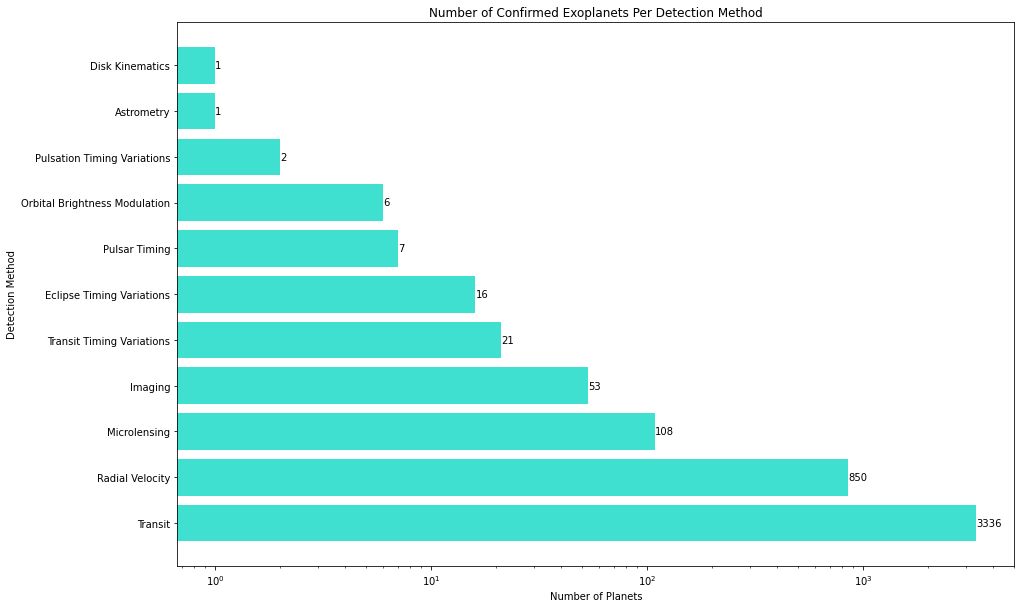

In [7]:
# Create a bar plot of exoplanet detections by discovery method
title = 'Number of Confirmed Exoplanets Per Detection Method'
xlabel = 'Number of Planets'
ylabel = 'Detection Method'

fig, ax = plt.subplots(figsize = (15,10))
plots.feature_bar_plot(ax, planet_data['discoverymethod'], 'h', title, xlabel, ylabel)
ax.set_xscale('log')

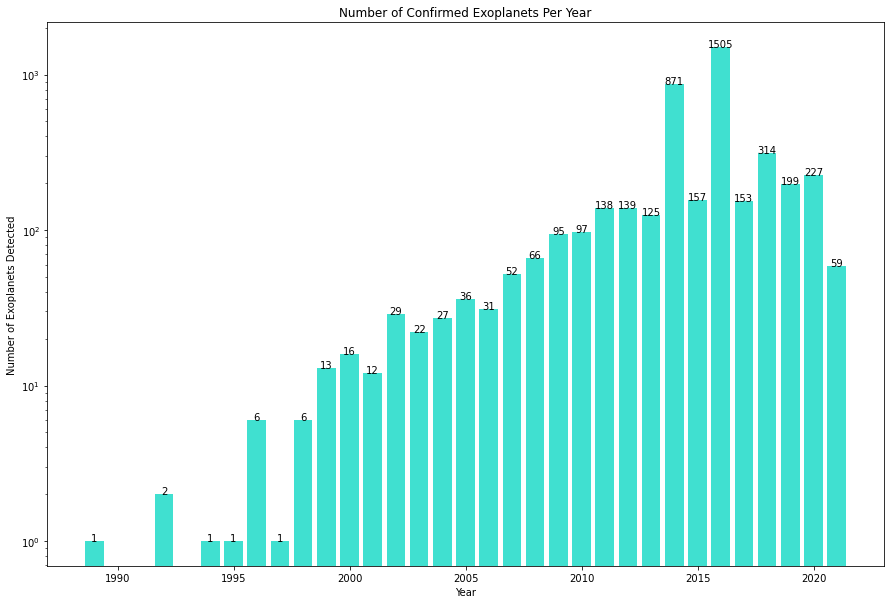

In [8]:
fig, ax_yrs = plt.subplots(figsize = (15,10))

title = 'Number of Confirmed Exoplanets Per Year'
xlabel = 'Year'
ylabel = 'Number of Exoplanets Detected'

plots.feature_bar_plot(ax_yrs, planet_data['disc_year'], 'v', title, xlabel, ylabel, sort=True)
ax_yrs.set_yscale('log')  # Set y axis to log scale


Text(0, 0.5, 'Number of Planets')

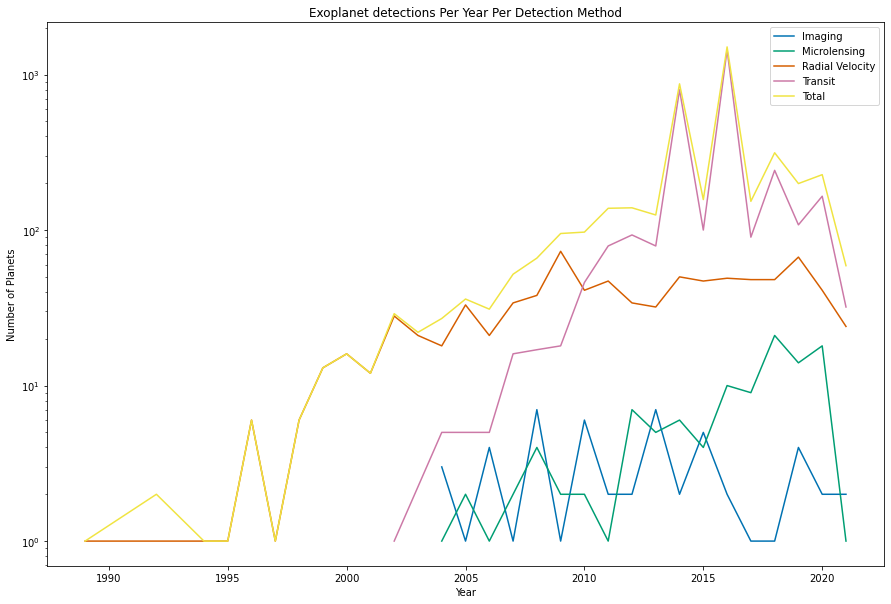

In [9]:
# Line plot per detection method
top_methods = disc_methods[disc_methods > 50].index

# Throw out methods with less than 50 detections to de-clutter plot
reduced_planet_data = planet_data[planet_data['discoverymethod'].isin(top_methods)]

# Plot number of detects over time for top methods
fig2, ax2 = plt.subplots(figsize=(15,10))
for name, method in reduced_planet_data.groupby('discoverymethod')['disc_year']:
    x = method.value_counts().sort_index().index
    y = method.value_counts().sort_index().values
    ax2.plot(x, y, label = f"{name}")
    
# Plot total number of planets per year for reference
num_planets_total = plots.feature_counts(planet_data['disc_year'], sort=True)
ax2.plot(num_planets_total.index, num_planets_total.values, label = 'Total')

# Add plot labels
ax2.set_yscale('log')
ax2.legend(loc='best')
ax2.set_title('Exoplanet detections Per Year Per Detection Method')
ax2.set_xlabel('Year')
ax2.set_ylabel('Number of Planets')


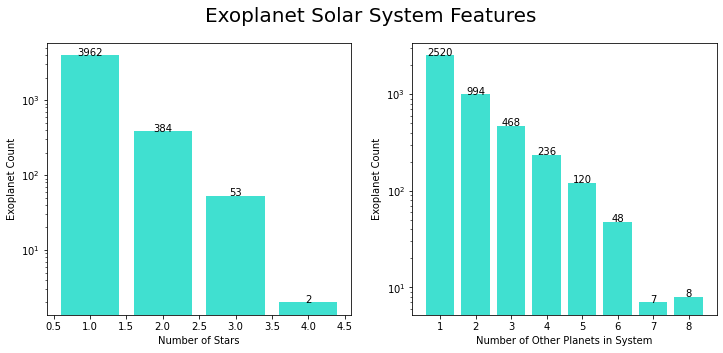

In [10]:
# Create bar plots of exoplanet host solar system features

ylabel = 'Exoplanet Count' # define common y label for both features

fig, axs = plt.subplots(1,2,figsize = (12,5))
fig.suptitle('Exoplanet Solar System Features', fontsize = 20)
plots.feature_bar_plot(axs[0], planet_data['sy_snum'], 'v', ' ', "Number of Stars", ylabel, sort=True)
axs[0].set_yscale('log')

plots.feature_bar_plot(axs[1], planet_data['sy_pnum'], 'v', ' ', 'Number of Other Planets in System', ylabel, sort=True)
axs[1].set_yscale('log')


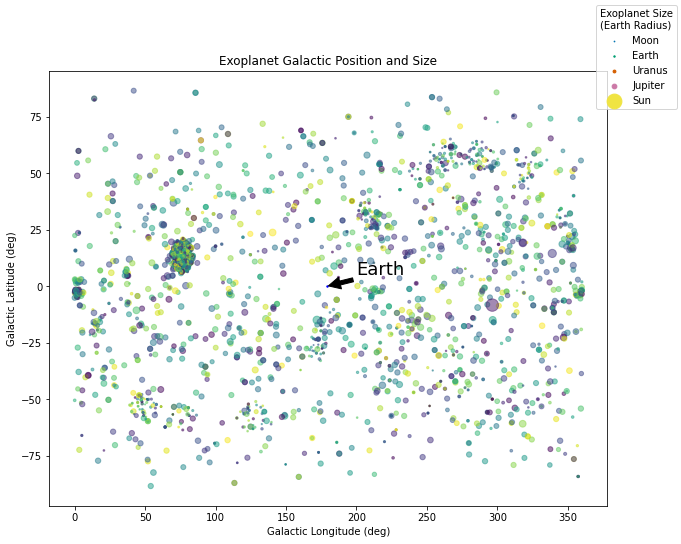

In [11]:
# Plot lat, long, size scaled to planet radius
fig,ax3 = plt.subplots(figsize=(10,8))
plots.galactic_plot(planet_data, fig, ax3, 'Exoplanet Galactic Position and Size')


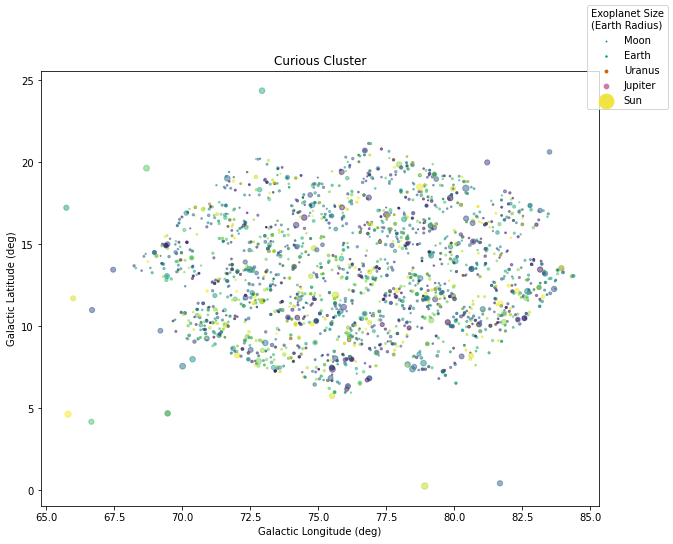

In [12]:
# Filter the data that corresponds to the dense cluster from the previous plot
curious_cluster = planet_data[(planet_data['glat'] > 0) & (planet_data['glat'] < 25)\
                              & (planet_data['glon'] > 65) & (planet_data['glon'] < 85)]
# Plot the cluster
fig, ax_4 = plt.subplots(figsize=(10,8))
plots.galactic_plot(curious_cluster, fig, ax_4, 'Curious Cluster',plot_earth = False)


In [13]:
curious_cluster #Print the dataframe to examine the subset

,pl_name,discoverymethod,disc_year,disc_facility,sy_snum,sy_pnum,glat,glon,pl_orbper,pl_rade,sy_dist,pl_eqt,pl_orbeccen
2,Kepler-276 c,Transit,2013,Kepler,1,3,9.13322,72.30607,31.884000,2.900,1144.860,563.0,0.00
3,Kepler-829 b,Transit,2016,Kepler,1,1,18.29325,71.95093,6.883376,2.110,1073.760,857.0,0.00
5,Kepler-477 b,Transit,2016,Kepler,2,1,14.33019,73.50616,11.119907,2.070,367.000,649.0,0.00
20,Kepler-1390 b,Transit,2016,Kepler,1,1,10.29931,82.29819,6.480217,1.180,723.431,934.0,0.00
21,Kepler-393 c,Transit,2014,Kepler,1,2,13.57678,77.06756,14.613612,1.330,881.404,901.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4382,Kepler-10 b,Transit,2011,Kepler,1,2,18.81626,80.48988,0.837491,1.481,185.506,2130.0,0.06
4383,Kepler-1257 b,Transit,2016,Kepler,1,1,10.58208,79.09698,2.668314,1.520,1105.950,1252.0,0.00
4384,Kepler-1100 b,Transit,2016,Kepler,1,1,12.53992,76.31734,6.422001,1.750,693.618,1000.0,0.00
4385,Kepler-152 b,Transit,2014,Kepler,1,2,15.00096,72.79154,18.207973,2.790,441.090,551.0,0.00


In [14]:
# Separate data by decades
data_decade_1 = planet_data[planet_data['disc_year'] <=2000]
data_decade_2 = planet_data[(planet_data['disc_year'] > 2000) & (planet_data['disc_year'] <= 2010)]
data_decade_3 = planet_data[(planet_data['disc_year'] > 2010) & (planet_data['disc_year'] <= 2021)]

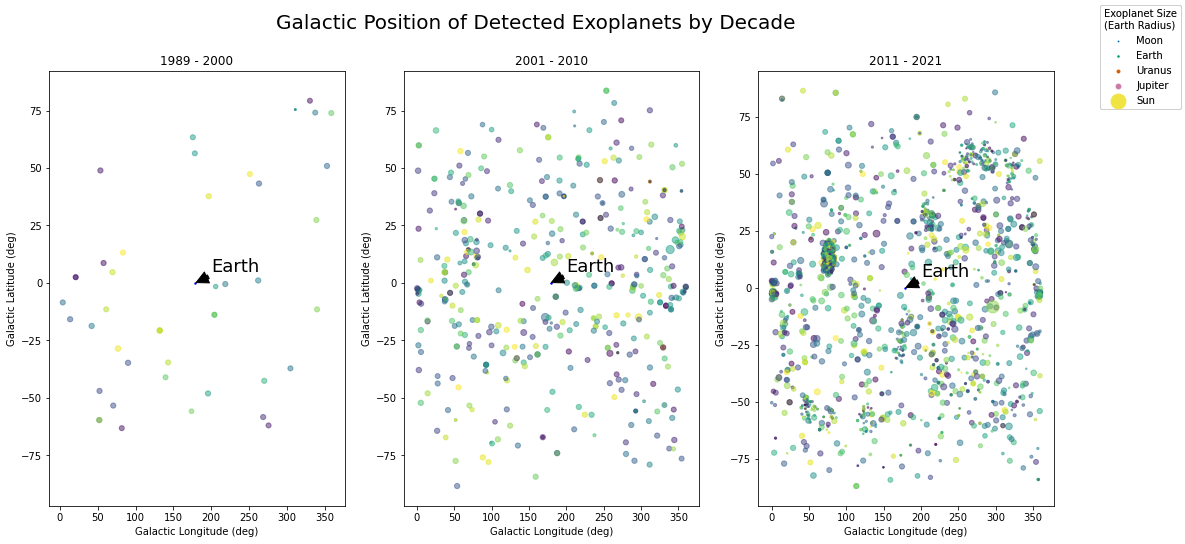

In [15]:
# Facet plots/color code over decade
 
fig,ax6 = plt.subplots(1,3, figsize=(18,8))
# 1st subplot
plots.galactic_plot(data_decade_1, fig, ax6[0], '1989 - 2000')

# 2nd subplot
plots.galactic_plot(data_decade_2, fig, ax6[1], '2001 - 2010')

# 3rd subplot
plots.galactic_plot(data_decade_3, fig, ax6[2], '2011 - 2021')
fig.suptitle('Galactic Position of Detected Exoplanets by Decade', fontsize = 20)
ax6[0].set_ylim(ax6[1].get_ylim());


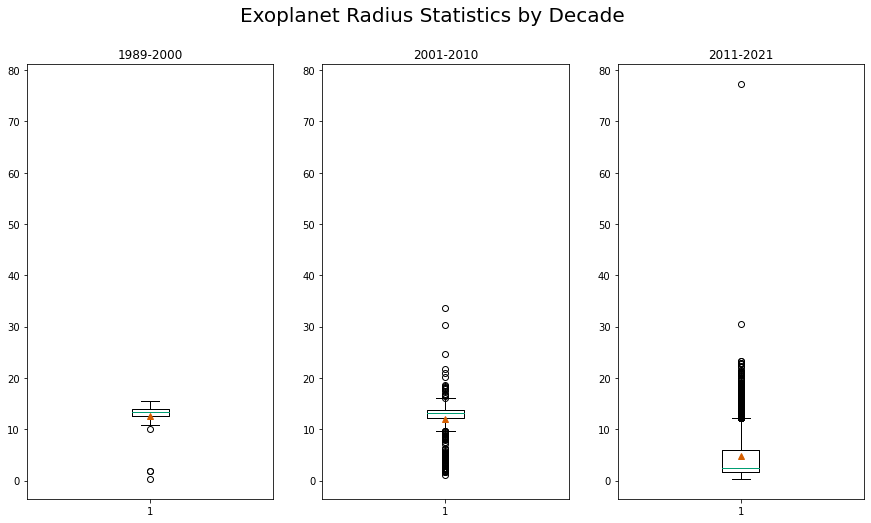

In [16]:
# Box plots by decade

fig, ax_boxes = plt.subplots(1,3, figsize = (15,8))
plots.box_facet(ax_boxes, [data_decade_1, data_decade_2, data_decade_3], 'pl_rade', ['1989-2000', '2001-2010', '2011-2021'])
fig.suptitle('Exoplanet Radius Statistics by Decade', fontsize = 20);


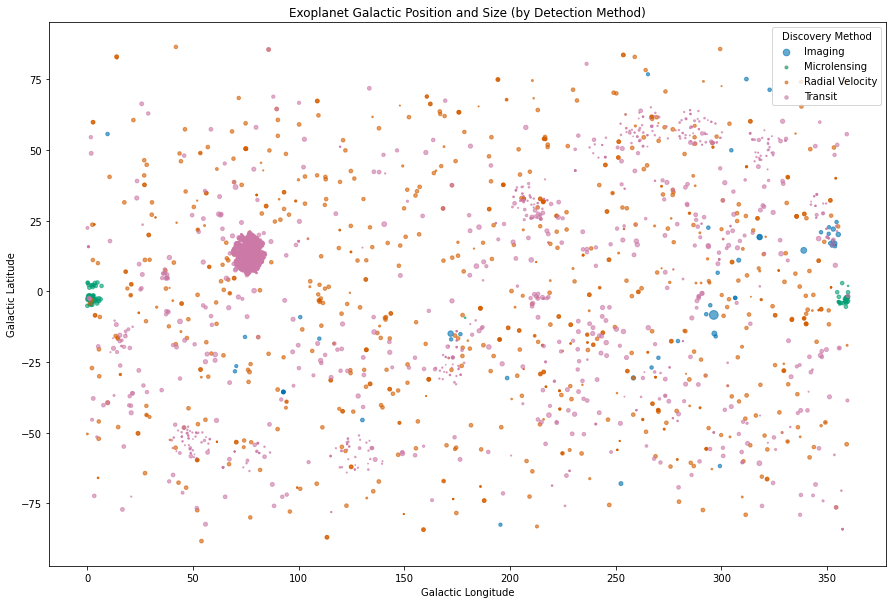

In [17]:
# Plot lat, long, size scaled to planet radius

# Color code by discovery method
fig,ax7 = plt.subplots(figsize=(15,10))

for name, method in reduced_planet_data.groupby('discoverymethod'):
    ax7.scatter(x = 'glon', y = 'glat', s= 'pl_rade', label = f"{name}", data = method, alpha = 0.6)
ax7.legend(title='Discovery Method', loc='best')

ax7.set_xlabel('Galactic Longitude')
ax7.set_ylabel('Galactic Latitude')
ax7.set_title('Exoplanet Galactic Position and Size (by Detection Method)');

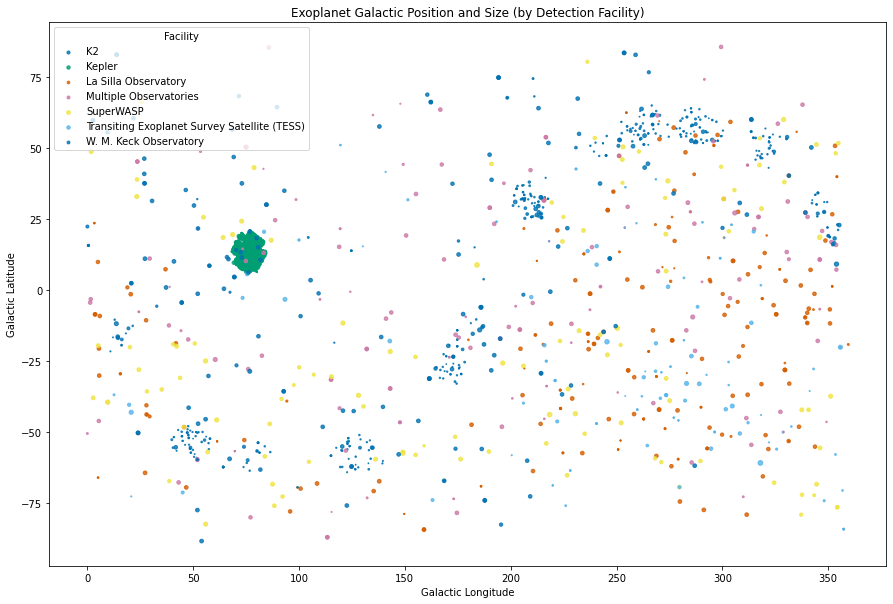

In [18]:
# Separate top discovery facilities for plotting
facilities = planet_data['disc_facility'].value_counts()
top_facilities = facilities[facilities > 100].index

# Throw out methods with less than 50 detections to de-clutter plot
facilities_planet_data = planet_data[planet_data['disc_facility'].isin(top_facilities)]

# Color code by discovery method
fig,ax8 = plt.subplots(figsize=(15,10))

for name, facility in facilities_planet_data.groupby('disc_facility'):
    ax8.scatter(x = 'glon', y = 'glat', s= 'pl_rade', label = f"{name}", data = facility, alpha = 0.8)
ax8.legend(title='Facility', loc='best')

ax8.set_xlabel('Galactic Longitude')
ax8.set_ylabel('Galactic Latitude')
ax8.set_title('Exoplanet Galactic Position and Size (by Detection Facility)');


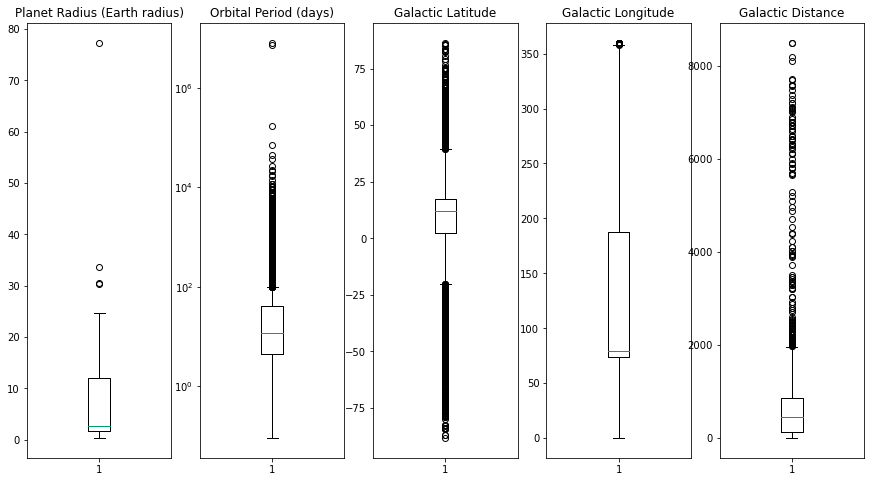

In [19]:
# Box plots of planet characteristics
fig, axs9 = plt.subplots(1,5, figsize = (15,8))
axs9[0].boxplot(planet_data['pl_rade'].dropna())
axs9[0].set_title('Planet Radius (Earth radius)')

axs9[1].boxplot(planet_data['pl_orbper'].dropna())
axs9[1].set_title('Orbital Period (days)')
axs9[1].set_yscale('log')

axs9[2].boxplot(planet_data['glat'].dropna())
axs9[2].set_title('Galactic Latitude')

axs9[3].boxplot(planet_data['glon'].dropna())
axs9[3].set_title('Galactic Longitude')

axs9[4].boxplot(planet_data['sy_dist'].dropna())
axs9[4].set_title('Galactic Distance');

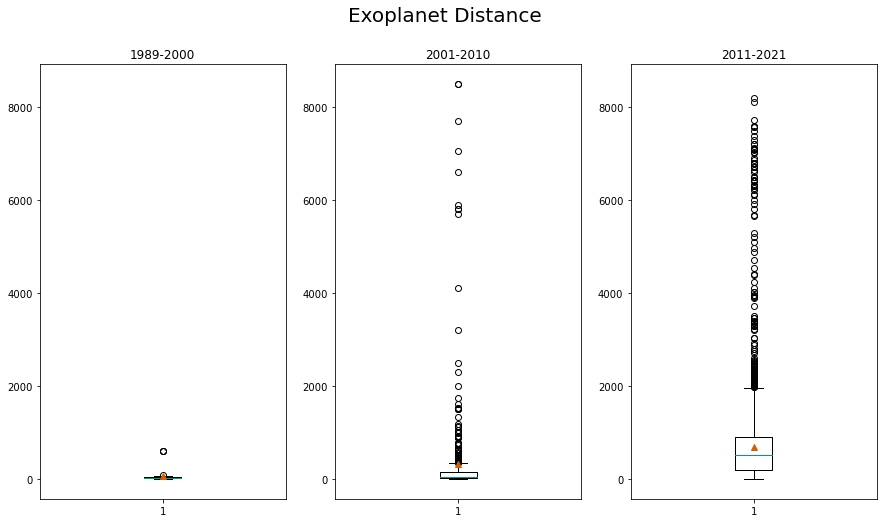

In [20]:
# Box plots of galactic distance by decade
fig, ax_boxes = plt.subplots(1,3, figsize = (15,8))

plots.box_facet(ax_boxes, [data_decade_1, data_decade_2, data_decade_3], 'sy_dist', ['1989-2000', '2001-2010', '2011-2021'])
fig.suptitle('Exoplanet Distance', fontsize = 20);